### 异常检测

#### 为什么反欺诈检测难度很高？

反欺诈项目很多情况下就是客户根本不知道什么是欺诈，什么不是。换句话说，诈骗的定义很模糊。

往小了说，反诈骗似乎是一个二分类问题(binary classification)，但你仔细想想后会发现其实这是个多分类问题(multi-class classification)，因为可以每种不同的诈骗都当做一种单独的类型。除了欺诈手段多样且持续变化，欺诈检测一般还面临以下问题：

- 大部分情况下数据是没有标签(label)的，各种成熟的监督学习(supervised learning)没有用武之地。
- 区分噪音(noise)和异常点(anomaly)时难度很大，甚至需要发挥一点点想象力和直觉。
- 当多种诈骗数据混合在一起，区分不同的诈骗类型更难。根本原因还是因为我们并不了解每一种诈骗定义。
- 即使我们真的有诈骗的历史数据，即在有标签的情况下用监督学习，也存在很大的风险。用这样的历史数据学出的模型只能检测曾经出现过与历史诈骗相似的诈骗，而对于变种的诈骗和从未见过的诈骗，我们的模型将会无能为力。

因此，在实际情况中，我不建议直接用任何监督学习，至少不能单纯依靠一个监督学习模型来奢求检测到所有的诈骗。

这就陷入了一个死循环，因为没有历史标签和对诈骗的理解，我们无法做出能对诈骗细分的模型。因此我们一般使用无监督学习(unsupervised learning)，且需要领域专家(domain experts)也就是对这个行业非常了解的人来验证我们的预测，提供反馈，以便于及时的调整模型。

#### 拿到含有欺诈的数据后我们该做些什么？

- 相关矩阵(Correlation Matrix)
- 多维尺度变换(Multidimensional Scaling) 

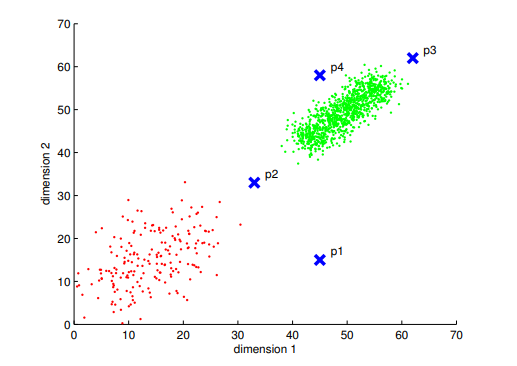

In [88]:
from IPython.display import Image
Image(filename='./image/12.png', width=400) 

首先思考，当我们有一个场景需要做预判的时候，又完全没有标签，我们能做什么？

- 迁移学习
- 专家模型
- 无监督算法

#### 迁移学习
源域样本和目标域样本分布有区别，目标域样本量又不够。通过算法缩小边缘分布之间和条件分布下的差异。

- 基于实例迁移
- 基于特征的迁移
- 基于模型的迁移

缺点：需要拥有与当前目标场景相关的源域数据。

#### 专家模型

家经验判断是根据信贷专家多年从业经验进行定性判断。与我们常用的模型不同，它是根据主观经验进行打分，而不是根据统计分析或者模型算法来进行客观的计算。  

操作：

- 凭经验判断特征重要性
- 凭经验为变量加权

缺点：需要大量的行业经验积累，有时候很难让人信服。

#### 无监督算法

缺乏足够的先验知识，无法对数据进行标记时,使用的一种机器学习方法。代表有聚类、降维等。在风控领域中我们主要使用的是**聚类**和**无监督异常检测**。而聚类是发现样本间的相似性，异常检测则是发现样本间的相异性。

### 聚类

- K-Means
- 均值漂移
- DBSCAN
- EM
- 凝聚层次
- 社区发现

在相当长的一段时间我们主要靠对负样本聚类，将我们的逾期客群描述成**欺诈风险**和**信用风险**两部分。社区发现算法也是当前识别团伙欺诈的主要手段之一，主要思想是通过知识图谱将小团体筛选出来。**在金融领域，聚集意味着风险**。请记住这句话，这将是知识图谱应用时候的核心思想之一。

### 异常检测

异常点检测(Outlier detection)，又称为离群点检测，是找出与预期对象的行为差异较大的对象的一个检测过程。这些被检测出的对象被称为异常点或者离群点。异常点检测在生产生活中有着广泛应用，比如信用卡反欺诈、工业损毁检测、广告点击反作弊等。异常点（outlier）是一个数据对象，它明显不同于其他的数据对象。如下图1所示，N1、N2区域内的点是正常数据。而离N1、N2较远的O1、O2、O3区域内的点是异常点。

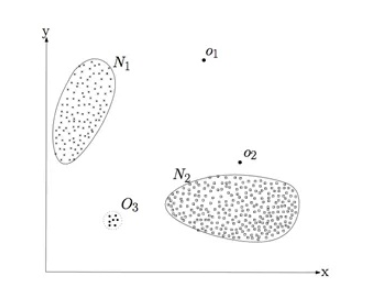

In [76]:
Image(filename='./image/6.png', width=300) 

和不均衡学习不同的是异常检测一般是无监督的，和普通的二分类问题也不大相同，因为异常检测往往看似是二分类，但其实是多分类（造成异常的原因各不相同）。  

#### 算法假设

- 异常数据跟样本中大多数数据不太一样。
- 异常数据在整体数据样本中占比比较小。


#### 主要思想

主流异常检测方法都是基于样本（小群体）间的相似度（proximity）

- 距离
- 密度
- 角度
- 隔离所需的难度
- 簇

为什么要用无监督异常检测方法？

- 样本群体有异构成分，可以对样本做筛选
- 很多场景没有标签或者标签很少，不能训练监督模型（比如冷启动项目、欺诈模型）
- 样本总是在发生变换，只能从一个小群体内部发现异常（比如欺诈检测，手段多变，团伙欺诈通常集中在某段时间内）
- 异常检测假设异常样本占比很少，并且从某种度量上远离其他样本，这符合我们个体欺诈的先验知识。但是在团体欺诈检测中就不太适用了

今天这节课主要涉及四个检验算法：

- Z-score检验
- KNN算法
- Local Outlier Factor
- 孤立森林

In [1]:
import pandas as pd
from sklearn.metrics import roc_auc_score,roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import numpy as np
import random
import math

data = pd.read_csv('./data/Acard.txt')
data.head()

,obs_mth,bad_ind,uid,td_score,jxl_score,mj_score,rh_score,zzc_score,zcx_score,person_info,finance_info,credit_info,act_info
0,2018-10-31,0.0,A10000005,0.675349,0.144072,0.186899,0.483640,0.928328,0.369644,-0.322581,0.023810,0.00,0.217949
1,2018-07-31,0.0,A1000002,0.825269,0.398688,0.139396,0.843725,0.605194,0.406122,-0.128677,0.023810,0.00,0.423077
2,2018-09-30,0.0,A1000011,0.315406,0.629745,0.535854,0.197392,0.614416,0.320731,0.062660,0.023810,0.10,0.448718
3,2018-07-31,0.0,A10000481,0.002386,0.609360,0.366081,0.342243,0.870006,0.288692,0.078853,0.071429,0.05,0.179487
4,2018-07-31,0.0,A1000069,0.406310,0.405352,0.783015,0.563953,0.715454,0.512554,-0.261014,0.023810,0.00,0.423077


train_ks :  0.4482453222991063
val_ks :  0.4198642457760936


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


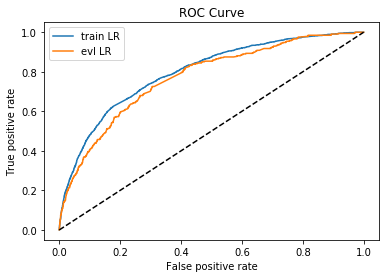

In [3]:
train = data[data.obs_mth != '2018-11-30'].reset_index().copy()
val = data[data.obs_mth == '2018-11-30'].reset_index().copy()
feature_lst = ['person_info','finance_info','credit_info','act_info']

x = train[feature_lst]
y = train['bad_ind']

val_x =  val[feature_lst]
val_y = val['bad_ind']

lr_model = LogisticRegression(C=0.1,class_weight='balanced')
lr_model.fit(x,y)
y_pred = lr_model.predict_proba(x)[:,1]
fpr_lr_train,tpr_lr_train,_ = roc_curve(y,y_pred)
train_ks = abs(fpr_lr_train - tpr_lr_train).max()
print('train_ks : ',train_ks)

y_pred = lr_model.predict_proba(val_x)[:,1]
fpr_lr,tpr_lr,_ = roc_curve(val_y,y_pred)
val_ks = abs(fpr_lr - tpr_lr).max()
print('val_ks : ',val_ks)
from matplotlib import pyplot as plt
plt.plot(fpr_lr_train,tpr_lr_train,label = 'train LR')
plt.plot(fpr_lr,tpr_lr,label = 'evl LR')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc = 'best')
plt.show()

#### z-score异常检测  
  
假设样本服从正态分布，用于描述样本偏离正态分布的程度。 

通过计算$\mu$和$\sigma$得到当前样本所属于的正态分布的表达式，然后分别计算每个样本在这个概率密度函数下被生成的概率，当概率小于某一阈值我们认为这个样本是不属于这个分布的，因此定义为异常值。

计算公式：

$$
\mu=\frac{1}{m} \sum_{i=0}^{m} x^{(i)}
$$
 
$$
\sigma^{2}=\frac{1}{m} \sum_{i=1}^{m}\left(x^{(i)}-\mu\right)^{2}
$$

一旦我们获得了平均值和方差的估计值，给定了新的一个训练实例，根据模型计算p(x) p(x)p(x)：
$$
p(x)=\prod_{j=1}^{n} p\left(x_{j} ; \mu_{j}, \sigma_{j}^{2}\right)=\prod_{j=1}^{1} \frac{1}{\sqrt{2 \pi} \sigma} \exp \left(-\frac{(x-\mu)^{2}}{2 \sigma^{2}}\right)
$$

当p(x)&lt;ε p(x)&lt;\varepsilonp(x)<ε时，数据为异常。  

缺点：需要假设样本满足正态分布，而我们大部分场景都不满足这种假设条件。  

#### KNN异常检测
  
KNN算法专注于全局异常检测，所以无法检测到局部异常。 

首先，对于数据集中的每条记录，必须找到k个最近的邻居。然后使用这K个邻居计算异常分数。  
  
我们有三种方法  
- 最大：使用到第k个邻居的距离作为离群值得分  
- 平均值：使用所有k个邻居的平均值作为离群值得分  
- 中位数：使用到k个邻居的距离的中值作为离群值得分  
  
在实际方法中后两种的应用度较高。然而，分数的绝对值在很大程度上取决于数据集本身、维度数和规范化。             
  
参数k的选择当然对结果很重要。如果选择过低，记录的密度估计可能不可靠。（即过拟合）另一方面，如果它太大，密度估计可能太粗略。K值的选择通常在10<k<50这个范围内。所以在分类方法中，选择一个合适的K值，可以用交叉验证法。  

但是，事实上基于KNN的算法都是不适用于欺诈检测的，因为他们本身就对噪声比较敏感。

#### Local Outlier Factor
LOF是基于密度的经典算法（Breuning et. al. 2000）, 文章发表于 SIGMOD 2000, 到目前已经有 3000+ 的引用。在 LOF 之前的异常检测算法大多是基于统计方法的，或者是借用了一些聚类算法用于异常点的识别（比如 ，DBSCAN，OPTICS）。但是，基于统计的异常检测算法通常需要假设数据服从特定的概率分布，这个假设往往是不成立的。而聚类的方法通常只能给出 0/1 的判断（即：是不是异常点），不能量化每个数据点的异常程度。相比较而言，基于密度的LOF算法要更简单、直观。它不需要对数据的分布做太多要求，还能量化每个数据点的异常程度（outlierness）。

#### 算法介绍

LOF 是基于密度的算法，其最核心的部分是关于数据点密度的刻画。如果对 distanced-based 或者 density-based 的聚类算法有些印象，你会发现 LOF 中用来定义密度的一些概念似曾相识。了解了这些核心概念，整个算法也就显而易见了。而整个算法，最主要的是下面四个概念：

**1）K-邻近距离（k-distance）**：在距离数据点 p 最近的几个点中，第 k 个最近的点跟点 p 之间的距离称为点 p 的 K-邻近距离，记为 k-distance (p) 。

**2）可达距离（rechability distance）**：可达距离的定义跟K-邻近距离是相关的，给定参数k时， 数据点 p 到 数据点 o 的可达距离 reach-dist（p, o）为数据点 o 的K-邻近距离 和 数据点p与点o之间的直接距离的最大值。即：
$$
reachdist_{k}(p, o)=\max \{k-\text { distance }(o), d(p, o)\}
$$

**3）局部可达密度（local rechability density）**：局部可达密度的定义是基于可达距离的，对于数据点 p，那些跟点p的距离小于等于 k-distance（p）的数据点称为它的 k-nearest-neighbor，记为 $N_k(p)$，数据点 p 的局部可达密度为它与邻近的数据点的平均可达距离的倒数，即：
$$
\operatorname{lr} d_{k}(p)=\frac{1}{\frac{\sum_{o \in N_{k}(p)} \text {reach} \text { dist }_{k}(p, o)}{\left|N_{k}(p)\right|}}
$$

**4）局部异常因子（local outlier factor）**：根据局部可达密度的定义，如果一个数据点跟其他点比较疏远的话，那么显然它的局部可达密度就小。但LOF算法衡量一个数据点的异常程度，并不是看它的绝对局部密度，而是看它跟周围邻近的数据点的相对密度。这样做的好处是可以允许数据分布不均匀、密度不同的情况。局部异常因子即是用局部相对密度来定义的。数据点 p 的局部相对密度（局部异常因子）为点p的邻居们的平均局部可达密度跟数据点p的局部可达密度的比值，即：
$$
L O F_{k}(p)=\frac{\sum_{o \in N_{k}(p)} \frac{l r d(o)}{l r d(p)}}{\left|N_{k}(p)\right|}=\frac{\sum_{o \in N_{k}(p)} \operatorname{lr} d(o)}{\left|N_{k}(p)\right|} / \operatorname{lr} d(p)
$$

根据局部异常因子的定义，如果数据点 p 的 LOF 得分在1附近，表明数据点p的局部密度跟它的邻居们差不多；如果数据点 p 的 LOF 得分小于1，表明数据点p处在一个相对密集的区域，不像是一个异常点；如果数据点 p 的 LOF 得分远大于1，表明数据点p跟其他点比较疏远，很有可能是一个异常点。下面这个图来自 Wikipedia 的 LOF 词条，展示了一个二维的例子。上面的数字标明了相应点的LOF得分，可以让人对LOF有一个直观的印象。

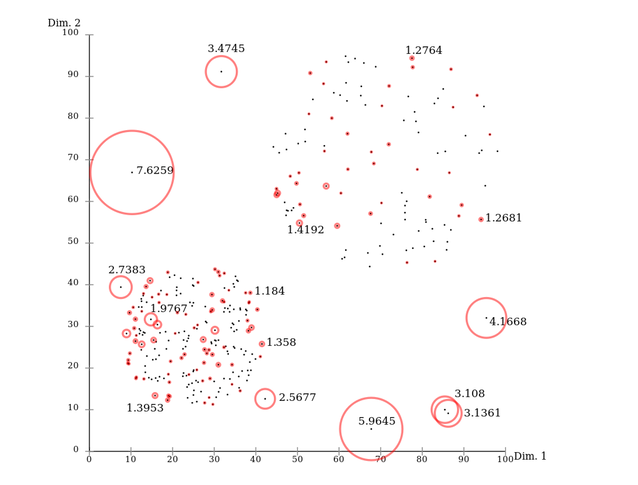

In [85]:
Image(filename='./image/11.png', width=600) 

了解了 LOF 的定义，整个算法也就显而易见了：  
  
1. 对于每个数据点，计算它与其它所有点的距离，并按从近到远排序；  
    
2. 对于每个数据点，找到它的 k-nearest-neighbor，计算 LOF 得分。  

In [5]:
from pyod.models.lof import LOF
clf = LOF(n_neighbors=20, algorithm='auto', leaf_size=30, metric='minkowski', p=2, 
          metric_params=None, contamination=0.1, n_jobs=1)
clf.fit(x)

LOF(algorithm='auto', contamination=0.1, leaf_size=30, metric='minkowski',
  metric_params=None, n_jobs=1, n_neighbors=20, p=2)

#### 算法应用

LOF算法中关于局部可达密度的定义其实暗含了一个假设，即：不存在大于等于 k 个重复的点。当这样的重复点存在的时候，这些点的平均可达距离为零，局部可达密度就变为无穷大，会给计算带来一些麻烦。在实际应用时，为了避免这样的情况出现，可以把 k-distance 改为 k-distinct-distance，不考虑重复的情况。或者，还可以考虑给可达距离都加一个很小的值，避免可达距离等于零。  


LOF 算法需要计算数据点两两之间的距离，造成整个算法时间复杂度为 $O(n^2)$ 。为了提高算法效率，后续有算法尝试改进。  

FastLOF （Goldstein，2012）先将整个数据随机的分成多个子集，然后在每个子集里计算 LOF 值。对于那些 LOF 异常得分小于等于 1 的，从数据集里剔除，剩下的在下一轮寻找更合适的 nearest-neighbor，并更新 LOF 值。  

这种先将数据粗略分成多个部分，然后根据局部计算结果将数据过滤来减少计算量的想法，并不罕见。比如，为了改进 K-means 的计算效率， Canopy Clustering 算法也采用过比较相似的做法。

#### Isolation Forest

我们先用一个简单的例子来说明 Isolation Forest 的基本想法。假设现在有一组一维数据（如下图所示），我们要对这组数据进行随机切分，希望可以把点 A 和点 B 单独切分出来。具体的，我们先在最大值和最小值之间随机选择一个值 x，然后按照 <x 和 >=x 可以把数据分成左右两组。然后，在这两组数据中分别重复这个步骤，直到数据不可再分。显然，点 B 跟其他数据比较疏离，可能用很少的次数就可以把它切分出来；点 A 跟其他数据点聚在一起，可能需要更多的次数才能把它切分出来。

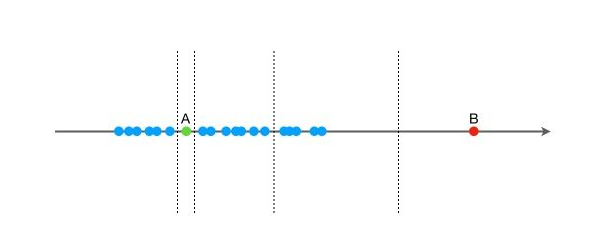

In [62]:
Image(filename='./image/1.png', width=600) 

我们把数据从一维扩展到两维。同样的，我们沿着两个坐标轴进行随机切分，尝试把下图中的点A'和点B'分别切分出来。我们先随机选择一个特征维度，在这个特征的最大值和最小值之间随机选择一个值，按照跟特征值的大小关系将数据进行左右切分。然后，在左右两组数据中，我们重复上述步骤，再随机的按某个特征维度的取值把数据进行细分，直到无法细分，即：只剩下一个数据点，或者剩下的数据全部相同。跟先前的例子类似，直观上，点B'跟其他数据点比较疏离，可能只需要很少的几次操作就可以将它细分出来；点A'需要的切分次数可能会更多一些。

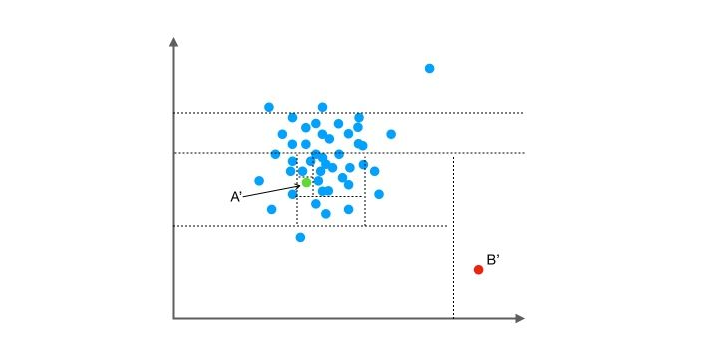

In [63]:
Image(filename='./image/2.png', width=600)

按照先前提到的关于“异常”的两个假设，一般情况下，在上面的例子中，点B和点B' 由于跟其他数据隔的比较远，会被认为是异常数据，而点A和点A' 会被认为是正常数据。直观上，异常数据由于跟其他数据点较为疏离，可能需要较少几次切分就可以将它们单独划分出来，而正常数据恰恰相反。这其实正是Isolation Forest（IF）的核心概念。IF采用二叉树去对数据进行切分，数据点在二叉树中所处的深度反应了该条数据的“疏离”程度。整个算法大致可以分为两步：  
  
- 训练：抽取多个样本，构建多棵二叉树（Isolation Tree，即 iTree）；  
- 预测：综合多棵二叉树的结果，计算每个数据点的异常分值。  

训练：构建一棵 iTree 时，先从全量数据中抽取一批样本，然后随机选择一个特征作为起始节点，并在该特征的最大值和最小值之间随机选择一个值，将样本中小于该取值的数据划到左分支，大于等于该取值的划到右分支。然后，在左右两个分支数据中，重复上述步骤，直到满足如下条件：

- 数据不可再分，即：只包含一条数据，或者全部数据相同。
- 二叉树达到限定的最大深度。  

预测：计算数据 x 的异常分值时，先要估算它在每棵 iTree 中的路径长度（也可以叫深度）。具体的，先沿着一棵 iTree，从根节点开始按不同特征的取值从上往下，直到到达某叶子节点。假设 iTree 的训练样本中同样落在 x 所在叶子节点的样本数为 T.size，则数据 x 在这棵 iTree 上的路径长度 h(x)，可以用下面这个公式计算：
$$
h(x)=e+C(T . \text {size})
$$

公式中，e 表示数据 x 从 iTree 的根节点到叶节点过程中经过的边的数目，C(T.size) 可以认为是一个修正值，它表示在一棵用 T.size 条样本数据构建的二叉树的平均路径长度。一般的，C(n) 的计算公式如下：
$$
C(n)=2 H(n-1)-\frac{2(n-1)}{n}
$$

其中，H(n-1) 可用 ln(n-1)+0.5772156649 估算，这里的常数是欧拉常数。数据 x 最终的异常分值 Score(x) 综合了多棵 iTree 的结果：
$$
S \operatorname{core}(x)=2^{-\frac{E(h(x))}{C(φ)}}
$$

公式中，E(h(x)) 表示数据 x 在多棵 iTree 的路径长度的均值，$φ$表示单棵 iTree 的训练样本的样本数，$C(φ)$表示用$φ$条数据构建的二叉树的平均路径长度，它在这里主要用来做归一化。

从异常分值的公式看，如果数据 x 在多棵 iTree 中的平均路径长度越短，得分越接近 1，表明数据 x 越异常；如果数据 x 在多棵 iTree 中的平均路径长度越长，得分越接近 0，表示数据 x 越正常；如果数据 x 在多棵 iTree 中的平均路径长度接近整体均值，则打分会在 0.5 附近。

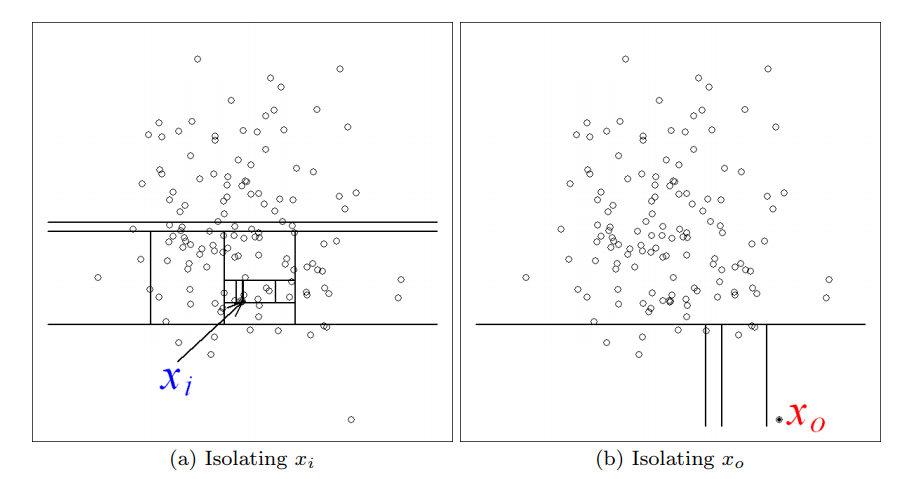

In [77]:
Image(filename='./image/7.png', width=650)

#### 应用案例

1.清洗建模数据集，将异常样本通过无监督算法进行筛选

In [58]:
from pyod.models.iforest import IForest
clf = IForest(behaviour='new', bootstrap=False, contamination=0.1, max_features=1.0,
                max_samples='auto', n_estimators=500, n_jobs=-1, random_state=None,verbose=0)
clf.fit(x)

IForest(behaviour='new', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=500, n_jobs=-1, random_state=None,
    verbose=0)

C:\Users\zixing.mei\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train_ks :  0.4243417677672226
val_ks :  0.4303193786076034


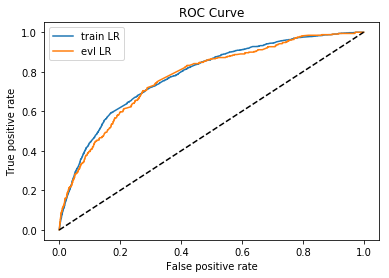

In [37]:
out_pred = clf.predict_proba(x,method ='linear')[:,1]
train['out_pred'] = out_pred

x = train[train.out_pred< 0.7][feature_lst]
y = train[train.out_pred < 0.7]['bad_ind']

val_x =  val[feature_lst]
val_y = val['bad_ind']

lr_model = LogisticRegression(C=0.1,class_weight='balanced')
lr_model.fit(x,y)
y_pred = lr_model.predict_proba(x)[:,1]
fpr_lr_train,tpr_lr_train,_ = roc_curve(y,y_pred)
train_ks = abs(fpr_lr_train - tpr_lr_train).max()
print('train_ks : ',train_ks)

y_pred = lr_model.predict_proba(val_x)[:,1]
fpr_lr,tpr_lr,_ = roc_curve(val_y,y_pred)
val_ks = abs(fpr_lr - tpr_lr).max()
print('val_ks : ',val_ks)
from matplotlib import pyplot as plt
plt.plot(fpr_lr_train,tpr_lr_train,label = 'train LR')
plt.plot(fpr_lr,tpr_lr,label = 'evl LR')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc = 'best')
plt.show()

2.通过样本异常程度进行分析

In [39]:
train.out_pred.groupby(train.obs_mth).mean()

obs_mth
2018-06-30    0.192853
2018-07-31    0.188666
2018-09-30    0.240877
2018-10-31    0.230139
Name: out_pred, dtype: float64

In [40]:
train.out_pred.groupby(train.obs_mth).max()

obs_mth
2018-06-30    0.998090
2018-07-31    0.994864
2018-09-30    1.000000
2018-10-31    0.968593
Name: out_pred, dtype: float64

In [41]:
train.out_pred.groupby(train.obs_mth).var()

obs_mth
2018-06-30    0.025732
2018-07-31    0.022533
2018-09-30    0.037034
2018-10-31    0.035351
Name: out_pred, dtype: float64

In [47]:
train['for_pred'] = np.where(train.out_pred>0.7,1,0)

In [48]:
train.for_pred.groupby(train.obs_mth).sum()/train.for_pred.groupby(train.obs_mth).count()

obs_mth
2018-06-30    0.016825
2018-07-31    0.010785
2018-09-30    0.035111
2018-10-31    0.028017
Name: for_pred, dtype: float64

3.preA模型  

- 比如我们将上面建模的孤立森林模型作为preA

In [51]:
#看一下badrate
train.bad_ind.groupby(train.for_pred).sum()/train.bad_ind.groupby(train.for_pred).count()

for_pred
0    0.016417
1    0.122995
Name: bad_ind, dtype: float64

可也看到异常值超过0.7的客群badrate达到了12%，将这一部分人拒绝会使我们的收益有所提高。

4.冷启动项目/反欺诈模型

- 假设前面的A卡没有标签，我们来看一下直接无监督建模的模型实际效果会是怎么样

train_ks :  0.3302166460813136
val_ks :  0.3233653844655018


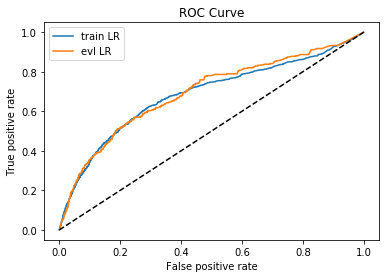

In [59]:
y_pred = clf.predict_proba(x,method ='linear')[:,1]
fpr_lr_train,tpr_lr_train,_ = roc_curve(y,y_pred)
train_ks = abs(fpr_lr_train - tpr_lr_train).max()
print('train_ks : ',train_ks)

y_pred = clf.predict_proba(val_x,method ='linear')[:,1]
fpr_lr,tpr_lr,_ = roc_curve(val_y,y_pred)
val_ks = abs(fpr_lr - tpr_lr).max()
print('val_ks : ',val_ks)
from matplotlib import pyplot as plt
plt.plot(fpr_lr_train,tpr_lr_train,label = 'train LR')
plt.plot(fpr_lr,tpr_lr,label = 'evl LR')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc = 'best')
plt.show()

In [60]:
model = clf
row_num, col_num = 0, 0
bins = 20
Y_predict = [s[1] for s in model.predict_proba(val_x)]
Y = val_y
nrows = Y.shape[0]
lis = [(Y_predict[i], Y[i]) for i in range(nrows)]
ks_lis = sorted(lis, key=lambda x: x[0], reverse=True)
bin_num = int(nrows/bins+1)
bad = sum([1 for (p, y) in ks_lis if y > 0.5])
good = sum([1 for (p, y) in ks_lis if y <= 0.5])
bad_cnt, good_cnt = 0, 0
KS = []
BAD = []
GOOD = []
BAD_CNT = []
GOOD_CNT = []
BAD_PCTG = []
BADRATE = []
dct_report = {}
for j in range(bins):
    ds = ks_lis[j*bin_num: min((j+1)*bin_num, nrows)]
    bad1 = sum([1 for (p, y) in ds if y > 0.5])
    good1 = sum([1 for (p, y) in ds if y <= 0.5])
    bad_cnt += bad1
    good_cnt += good1
    bad_pctg = round(bad_cnt/sum(val_y),3)
    badrate = round(bad1/(bad1+good1),3)
    ks = round(math.fabs((bad_cnt / bad) - (good_cnt / good)),3)
    KS.append(ks)
    BAD.append(bad1)
    GOOD.append(good1)
    BAD_CNT.append(bad_cnt)
    GOOD_CNT.append(good_cnt)
    BAD_PCTG.append(bad_pctg)
    BADRATE.append(badrate)
    dct_report['KS'] = KS
    dct_report['BAD'] = BAD
    dct_report['GOOD'] = GOOD
    dct_report['BAD_CNT'] = BAD_CNT
    dct_report['GOOD_CNT'] = GOOD_CNT
    dct_report['BAD_PCTG'] = BAD_PCTG
    dct_report['BADRATE'] = BADRATE
val_repot = pd.DataFrame(dct_report)
val_repot

,KS,BAD,GOOD,BAD_CNT,GOOD_CNT,BAD_PCTG,BADRATE
0,0.164,69,730,69,730,0.210,0.086
1,0.246,43,756,112,1486,0.341,0.054
2,0.267,23,776,135,2262,0.412,0.029
3,0.319,33,766,168,3028,0.512,0.041
4,0.314,15,784,183,3812,0.558,0.019
5,0.310,15,784,198,4596,0.604,0.019
6,0.290,10,789,208,5385,0.634,0.013
7,0.276,12,787,220,6172,0.671,0.015
8,0.291,21,778,241,6950,0.735,0.026
9,0.286,15,784,256,7734,0.780,0.019


相比于逻辑回归有监督的评分卡来看效果还是稍差一些的，但是对于无监督学习来说效果是非常不错的。当然实际场景可能没有这么好，毕竟这里面的变量是通过有监督的方式筛选出来的，缺失值也填补成了BIVAR图最好看的样子。